<a href="https://colab.research.google.com/github/liorhirsch/Kaggle-Landmark-ML-Challange/blob/master/MobileNet_Sanduri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet v2 :  ***סוג אלגוריתם*** 
regular

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

validation_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

In [0]:
image_size = (224,224)
batch_size = 20
BASE_PATH="E:/Projects/ML_Project/Landmark_Kaggle_Challange"
training_data_dir = BASE_PATH + '/photos'
validation_data_dir = BASE_PATH + '/validation'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 67559 images belonging to 100 classes.
Found 7458 images belonging to 100 classes.


**Transfer learning**

In [0]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

In [0]:
base_model = applications.mobilenet.MobileNet(input_shape = (image_size[0], image_size[1], 3), alpha=1.0,depth_multiplier=1, dropout=1e-3,  include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=100)
# alpha - controls the width of the network.
#If alpha < 1.0, proportionally decreases the number of filters in each layer.
#If alpha > 1.0, proportionally increases the number of filters in each layer.
#If alpha = 1, default number of filters from the paper are used at each layer.

# depth_multiplier: depth multiplier for depthwise convolution
# dropout: dropout rate - קצב נשירה של הנתונים
#include_top: whether to include the fully-connected layer at the top of the network.
#input_tensor: optional Keras tensor (i.e. output of  layers.Input()) to use as image input for the model.
#pooling: Optional pooling mode for feature extraction when include_top is False.

In [0]:
base_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 193, 193, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 96, 96, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 96, 96, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
for layer in base_model.layers:
    print(layer.name)

input_1
Conv1_pad
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
bloc

In [0]:
print(len(base_model.layers))

155


In [0]:
for layer in base_model.layers[:155]:
    layer.trainable = False

In [0]:
classCount = 100

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(classCount,activation='softmax')(x) #final layer with softmax activation

model_final=Model(inputs=base_model.input,outputs=preds)

**Global Average Pooling**

In [0]:
# creating the final model 
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 193, 193, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 96, 96, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 96, 96, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

3377


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True 

#https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images

In [0]:
import os
path_results=BASE_PATH + "/results/MobileNet/Sanduri"
if not os.path.exists(path_results):
    os.makedirs(path_results)

In [0]:

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='auto')

In [0]:
import time

networkfileName = path_results + "/MobileNet_{}.h5".format(int(time.time()))
                      
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)



In [0]:
history = model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=5
                   ,callbacks = [checkpoint, early])

Epoch 1/5
  18/3377 [..............................] - ETA: 1:27:29 - loss: 4.7103 - acc: 0.0028

e:\projects\ml_project\venv\lib\site-packages\PIL\Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


3376/3377 [============================>.] - ETA: 1s - loss: 2.6147 - acc: 0.4053
Epoch 00001: val_acc improved from -inf to 0.02521, saving model to E:/Projects/ML_Project/Landmark_Kaggle_Challange/results/MobileNet/Hirsch/MobileNet_1547405425.h5
3377/3377 [==============================] - 5570s 2s/step - loss: 2.6146 - acc: 0.4054 - val_loss: 6.1549 - val_acc: 0.0252
Epoch 2/5
3376/3377 [============================>.] - ETA: 1s - loss: 1.4931 - acc: 0.6297
Epoch 00002: val_acc improved from 0.02521 to 0.02682, saving model to E:/Projects/ML_Project/Landmark_Kaggle_Challange/results/MobileNet/Hirsch/MobileNet_1547405425.h5
3377/3377 [==============================] - 5542s 2s/step - loss: 1.4933 - acc: 0.6297 - val_loss: 7.2646 - val_acc: 0.0268
Epoch 3/5
3376/3377 [============================>.] - ETA: 1s - loss: 1.2750 - acc: 0.6763
Epoch 00003: val_acc did not improve from 0.02682
3377/3377 [==============================] - 5504s 2s/step - loss: 1.2748 - acc: 0.6764 - val_loss:

In [0]:
model_final.save(path_results + "/mobile_net_sanduri_model_1.h5")

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


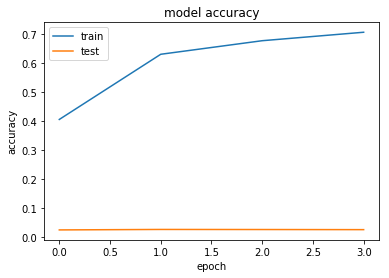

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

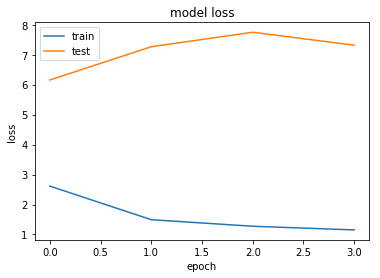

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Create results directory if it doesn't exist

Save data via pickle:


*   history_losses
*   history_accuracy
*   x




In [0]:
# import pickle

# with open(path_results + "/history_losses_1.pickle", "wb") as history_file:
#     pickle.dump(history.losses, history_file)
    
# with open(path_results + "/history_accuracy_1.pickle", "wb") as history_file:
#     pickle.dump(history.accuracy, history_file)
    
# with open(path_results + "/history_accuracy_1.pickle", "wb") as history_file:
#     pickle.dump(history.accuracy, history_file)

# with open(path_results + "/history_accuracy_1.pickle", "wb") as history_file:
#     pickle.dump(history.accuracy, history_file)

Example to load *`history_losses`* via pickle:

In [0]:
# history_losses_pickle_in = open("history_losses.pickle", "rb")
# history_losses = pickle.load(pickle_in)

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])

history2 = model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=4
                   ,callbacks = [checkpoint, early])

Epoch 1/4
   3/3377 [..............................] - ETA: 1:53:26 - loss: 0.8671 - acc: 0.7167

e:\projects\ml_project\venv\lib\site-packages\PIL\Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


3376/3377 [============================>.] - ETA: 1s - loss: 1.3223 - acc: 0.6625
Epoch 00001: val_acc improved from 0.02682 to 0.02749, saving model to E:/Projects/ML_Project/Landmark_Kaggle_Challange/results/MobileNet/Hirsch/MobileNet_1547405425.h5
3377/3377 [==============================] - 5521s 2s/step - loss: 1.3221 - acc: 0.6626 - val_loss: 7.4916 - val_acc: 0.0275
Epoch 2/4
3376/3377 [============================>.] - ETA: 1s - loss: 1.0577 - acc: 0.7267
Epoch 00002: val_acc did not improve from 0.02749
3377/3377 [==============================] - 5496s 2s/step - loss: 1.0575 - acc: 0.7268 - val_loss: 7.4588 - val_acc: 0.0216
Epoch 3/4
3376/3377 [============================>.] - ETA: 1s - loss: 0.9491 - acc: 0.7519
Epoch 00003: val_acc did not improve from 0.02749
3377/3377 [==============================] - 5518s 2s/step - loss: 0.9491 - acc: 0.7519 - val_loss: 7.2885 - val_acc: 0.0241
Epoch 00003: early stopping


In [0]:
model_final.save(path_results + "/mobile_net_sanduri_model_2.h5")

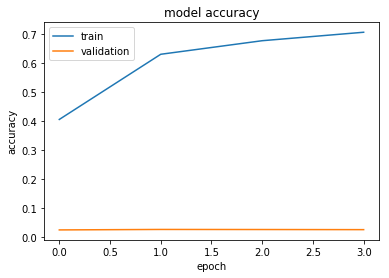

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

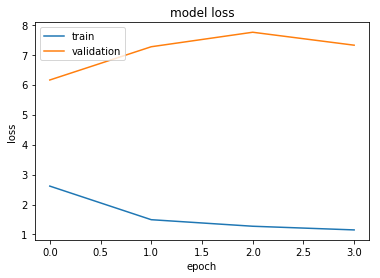

In [0]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
import pickle

with open(path_results + "/history_losses_val.pickle", "wb") as history_file:
    pickle.dump(history.history['val_loss'], history_file)
    
with open(path_results + "/history_accuracy_val.pickle", "wb") as history_file:
    pickle.dump(history.history['val_acc'], history_file)
    
with open(path_results + "/history_losses_train.pickle", "wb") as history_file:
    pickle.dump(history.history['loss'], history_file)
    
with open(path_results + "/history_accuracy_train.pickle", "wb") as history_file:
    pickle.dump(history.history['acc'], history_file)

In [0]:
BASE_PATH="E:/Projects/ML_Project/Landmark_Kaggle_Challange"
test_data_dir = BASE_PATH + '/test'

test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=image_size,
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

step_size_test=test_generator.n//test_generator.batch_size

test_loss, test_acc = model_final.evaluate_generator(generator=test_generator, 
                               steps=step_size_test)
                               


Found 18692 images belonging to 100 classes.
7.748841837080439 0.025481799162716885


In [0]:
print(test_loss)
print(test_acc)


7.748841837080439
0.025481799162716885


# extract feature